In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib
from matplotlib import pyplot
from tensorflow.keras import models,layers,optimizers,utils
import sklearn

In [21]:
url="/kaggle/input/iris-dataset/iris.csv"
names=['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset=pd.read_csv(url,names=names)

In [22]:
array=dataset.values

data=array[:,0:4]
print(data.shape)

labels=array[:,4]
print(labels.shape)


(150, 4)
(150,)


In [23]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
labels = encoder.fit_transform(labels)

print(labels)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [24]:
labels=pd.get_dummies(labels).values
labels[:5]

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False]])

In [25]:
data = np.asarray(data).astype('float32')

In [26]:
from sklearn.model_selection import train_test_split

train_data, validation_data, train_labels, validation_labels=train_test_split(data,labels, test_size=0.20, random_state=1)


In [27]:
print("Train Data Shape: ",train_data.shape)
print("Train Labels Shape: ",train_labels.shape)
print("Validation Data Shape: ",validation_data.shape)
print("validation labels Shape: ",validation_labels.shape)

Train Data Shape:  (120, 4)
Train Labels Shape:  (120, 3)
Validation Data Shape:  (30, 4)
validation labels Shape:  (30, 3)


# Model

In [28]:
from tensorflow.keras import models, layers, optimizers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(4,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
loss_function = tf.keras.losses.CategoricalCrossentropy()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:


def fitness_function(weights, model, loss_function, x_train, y_train):
    # Split the weights into four parts for each layer
    input_size = 4
    weights_1_size = input_size * 16
    weights_2_size = 16 * 16
    weights_3_size = 16 * 8
    weights_4_size = 8 * 3

    weights_1 = weights[:weights_1_size].reshape((input_size, 16))
    weights_2 = weights[weights_1_size:weights_1_size + weights_2_size].reshape((16, 16))
    weights_3 = weights[weights_1_size + weights_2_size:weights_1_size + weights_2_size + weights_3_size].reshape((16, 8))
    weights_4 = weights[weights_1_size + weights_2_size + weights_3_size:].reshape((8, 3))

    # Set the weights of the model
    model.layers[0].set_weights([weights_1, np.zeros(16)])
    model.layers[1].set_weights([weights_2, np.zeros(16)])
    model.layers[2].set_weights([weights_3, np.zeros(8)])
    model.layers[3].set_weights([weights_4, np.zeros(3)])

    # Calculate the loss on the entire training dataset
    y_pred = model(x_train)
    loss = loss_function(y_train, y_pred)

    return loss.numpy()  # Assuming the loss function returns a tensor


In [30]:
vector_length=472
population_size=4720


In [47]:
import numpy as np

# Xavier Initialization for vectors
def xavier_init(shape):
    """
    Args:
    - shape (int): Size of the weight vector to initialize.
    """
    var = 2.0 / shape  # Variance
    return np.random.randn(shape) * np.sqrt(var)  # Sample from Gaussian distribution

# He Initialization for vectors
def he_init(shape):
    """
    Args:
    - shape (int): Size of the weight vector to initialize.
    """
    var = 2.0 / shape  # Variance
    return np.random.randn(shape) * np.sqrt(var)  # Sample from Gaussian distribution

# LeCun Initialization for vectors
def lecun_init(shape):
    """
    Args:
    - shape (int): Size of the weight vector to initialize.
    """
    limit = np.sqrt(3.0 / shape)  # Limit
    return np.random.uniform(-limit, limit, shape)  # Sample from uniform distribution

# Orthogonal Initialization for vectors

def orthogonal_init(size):
    """
    Generate an orthogonal vector of the specified size.

    Args:
        size (int): Size of the weight vector to initialize.

    Returns:
        numpy.ndarray: An orthogonal vector with the specified size.
    """
    a = np.random.normal(0.0, 1.0, size)  # Generate random vector
    q, _ = np.linalg.qr(a.reshape(-1, 1))  # Compute QR decomposition
    return q.flatten()  # Return orthogonal vector as a 1D array


def generate_random_weights(size, min_value=-1.0, max_value=1.0):
    """
    Generate random float numbers for weights of a neural network.

    Args:
    - size (int): The size of the weight vector.
    - min_value (float, optional): The minimum value for the generated weights. Default is -1.0.
    - max_value (float, optional): The maximum value for the generated weights. Default is 1.0.

    Returns:
    - numpy.ndarray: A 1D array containing random float numbers within the specified range.
    """
    return np.random.uniform(min_value, max_value, size)

def generate_random_vector(size, min_value=-1.0, max_value=1.0):
    """
    Generate a random vector with float numbers within a specified range.

    Args:
    - size (int): The size of the vector.
    - min_value (float, optional): The minimum value for the generated numbers. Default is -1.0.
    - max_value (float, optional): The maximum value for the generated numbers. Default is 1.0.

    Returns:
    - numpy.ndarray: A 1D array containing random float numbers within the specified range.
    """
    return np.random.uniform(min_value, max_value, size)


In [32]:
# Define the chromosome class to store genes and fitness
class chromosome:
    Genes = None
    Fitness = None
    def __init__(self, genes, fitness):
        self.Genes = genes
        self.Fitness = fitness

In [48]:
# Function to create the initial population

import time

def make_population(method, population_size):
    # Initialize the population on GPU
    with tf.device('/device:GPU:0'):

        # Initialize empty list for population
        population = []

        # Show progress bar (optional)
        from tqdm import tqdm  # Install tqdm library if needed
        pbar = tqdm(total=population_size)

        start_time = time.time()
        
            # Loop through the population size
        for i in range(population_size):
            # Create chromosome and fitness
            if method == 1:
                genes = xavier_init(vector_length)
            elif method == 2:
                genes = lecun_init (vector_length)
            elif method==3:
                genes = generate_random_weights(vector_length)
            else: 
                genes = generate_random_vector(vector_length)
            fitness = fitness_function(genes, model, loss_function, train_data, train_labels)
            population.append(chromosome(genes, fitness))

            # Update progress bar (optional)
            pbar.update(1)

        # Print time taken (optional)
        end_time = time.time()
        print(f"Population creation completed in {end_time - start_time:.2f} seconds")

        # Close progress bar (optional)
        pbar.close()

    return population

# population = make_population(3, population_size)


In [34]:
# Calculate fitness diversity
def calculate_fitness_diversity(population):
    # Extract fitness values from the population
    fitness_values = [individual.Fitness for individual in population]

    # Calculate the variance or standard deviation of fitness values
    fitness_variance = np.var(fitness_values)
    fitness_stddev = np.std(fitness_values)

    return fitness_variance, fitness_stddev

In [35]:
# Calculate fitness diversity
variance, stddev = calculate_fitness_diversity(population)

print("Fitness Variance:", variance)
print("Fitness Standard Deviation:", stddev)

Fitness Variance: 73.94913
Fitness Standard Deviation: 8.599368


**Mutation**:  **rand/1** mutation strategy, which is a common choice in JADE. The F parameter is adaptively updated and follows a Cauchy distribution, which is also typical in JADE.<br>
**Crossove**:  **binomial** crossover with an adaptively updated CR parameter. This is again a standard choice in JADE.<br>
**Selection**: You’re using **greedy selection**, where an individual is replaced by its trial vector only if the trial vector has better fitness. This is the correct approach in DE.<br>
**Adaptive Parameters**: You’re updating the CR and F parameters based on successful parameters, which is a key feature of JADE. If no individuals are updated in a generation, you reset CR and F to their default values, which is a reasonable approach.<br>
**Stagnation Check**: You’re checking for stagnation in terms of improvement in the best fitness and terminate the algorithm if there are too many stagnant generations. This is a good strategy to prevent unnecessary computations when the algorithm is not making significant progress.

with interm crossover

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy
# with bin and rand/1
def jade(fitness_function, population, dim=4019200, NP=300, CR=0.9, F=0.8, max_gen=4000, max_stagnant_generations=100):
    improvement_threshold = 1e-5
    memory_CR, memory_F = [], []
    best_fitness_progress = []  # List to store the best fitness value at each generation
    stagnant_generations = 0
    best_individual = None
    previous_best_fitness = float('inf')

    for gen in range(max_gen):
        mutants = np.empty((NP, dim))
        modified_indices = set()  # Keep track of individuals modified in this generation

        for i in range(NP):
            r1, r2, r3 = np.random.choice([j for j in range(NP) if j != i], 3, replace=False)

            # Mutation (rand/1)
            F = cauchy.rvs(loc=0.5, scale=0.1)  # F follows a Cauchy distribution
            mutant_genes = population[r1].Genes + F * (population[r2].Genes - population[r3].Genes)
            mutants[i] = mutant_genes[:dim]  # Ensure the mutant genes have the correct dimension

        cross_points = np.random.rand(NP, dim) < CR
        cross_points[np.arange(NP), np.random.randint(dim, size=NP)] = True  # Ensure at least one crossover

        trial_genes = np.where(cross_points, mutants, [pop.Genes for pop in population])
        trial_fitness = np.array([fitness_function(trial_genes[i], model, loss_function, train_data, train_labels) for i in range(NP)])

        improve_mask = trial_fitness < np.array([pop.Fitness for pop in population])
        for i in range(NP):
            if improve_mask[i]:
                population[i] = chromosome(trial_genes[i], trial_fitness[i])
                memory_CR.append(CR)
                memory_F.append(F)
                modified_indices.add(i)

        # Update CR and F based on successful parameters only
        if modified_indices:
            CR = (1 - 0.1) * CR + 0.1 * np.mean([memory_CR[i] for i in range(len(memory_CR))])
            F = (1 - 0.1) * F + 0.1 * np.mean([memory_F[i] for i in range(len(memory_F))])
        else:
            # Set default values for CR and F
            CR = 0.9
            F = 0.8

        best_fitness = min(population, key=lambda x: x.Fitness).Fitness
        best_fitness_progress.append(best_fitness)

        # Print progress
        print(f"Generation {gen + 1}/{max_gen} - Best Fitness: {best_fitness}")

        # Check if the fitness threshold is reached
        if best_fitness <= 0.08:
            print(f"Terminating due to fitness threshold reached.")
            break

        # Check for improvement stagnation
        if previous_best_fitness - best_fitness < improvement_threshold:
            stagnant_generations += 1
        else:
            stagnant_generations = 0

        if stagnant_generations >= max_stagnant_generations:
            print(f"Terminating due to {max_stagnant_generations} stagnant generations.")
            break

        previous_best_fitness = best_fitness

        # Plot the progression at intervals
        if gen % 10 == 0:
            plt.plot(range(1, gen + 2), best_fitness_progress[:gen + 1])
            plt.xlabel('Generation')
            plt.ylabel('Best Fitness')
            plt.title('Progression of JADE Algorithm')
            plt.grid(True)
            plt.show()

    return min(population, key=lambda x: x.Fitness)


In [46]:
 import copy
def run_algorithm_multiple_times(algorithm, fitness_function, population, num_runs=30, dim=4019200, NP=300, CR=0.9, F=0.8, max_gen=200):
    seeds = np.random.randint(1, 1000, size=num_runs)  # Generate random seeds for each run
    success_count = 0
    successful_seeds = []

    for i, seed in enumerate(seeds, start=1):
        np.random.seed(seed)  # Set the random seed for reproducibility
        print(f"Run {i}/{num_runs} - Random Seed: {seed}")
        
        # Generate a deep copy of the original population for this run
        population_copy = copy.deepcopy(population)
        
        # Run the specified algorithm with specified kwargs
        best_individual = algorithm(fitness_function, population_copy, dim=dim, NP=NP, CR=CR, F=F, max_gen=max_gen)
        
        # Check if the best fitness meets the success criteria
        if best_individual.Fitness <= 0.08:
            success_count += 1
            successful_seeds.append(seed)
    
    success_rate = success_count / num_runs * 100
    print(f"\nSuccess Rate: {success_rate:.2f}%")

    return successful_seeds

Run 1/5 - Random Seed: 180
Generation 1/200 - Best Fitness: 0.28750282526016235


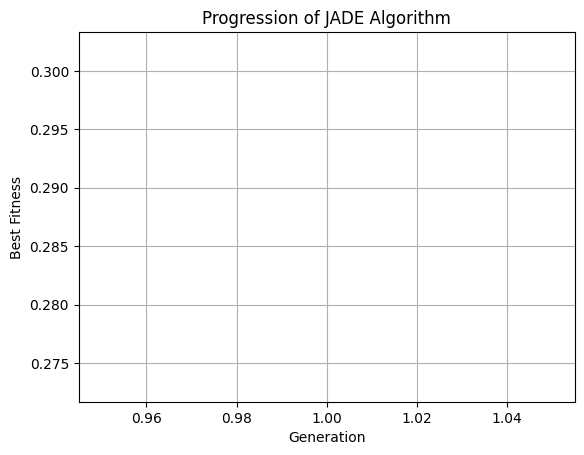

Generation 2/200 - Best Fitness: 0.28750282526016235
Generation 3/200 - Best Fitness: 0.18355518579483032
Generation 4/200 - Best Fitness: 0.18355518579483032
Generation 5/200 - Best Fitness: 0.12324266135692596
Generation 6/200 - Best Fitness: 0.12324266135692596
Generation 7/200 - Best Fitness: 0.12324266135692596
Generation 8/200 - Best Fitness: 0.12324266135692596
Generation 9/200 - Best Fitness: 0.12324266135692596
Generation 10/200 - Best Fitness: 0.12324266135692596
Generation 11/200 - Best Fitness: 0.12324266135692596


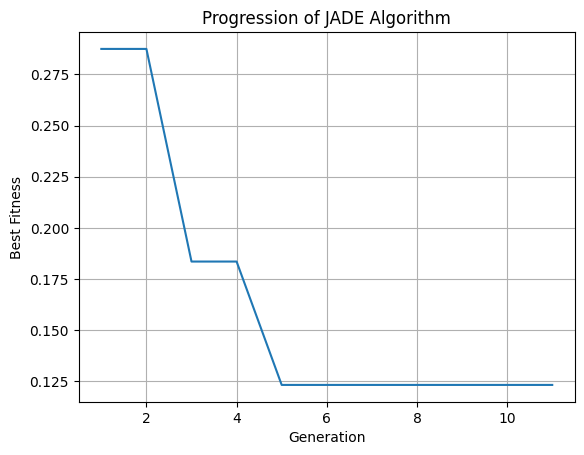

Generation 12/200 - Best Fitness: 0.12324266135692596
Generation 13/200 - Best Fitness: 0.12324266135692596
Generation 14/200 - Best Fitness: 0.12324266135692596
Generation 15/200 - Best Fitness: 0.12324266135692596
Generation 16/200 - Best Fitness: 0.12324266135692596
Generation 17/200 - Best Fitness: 0.12324266135692596
Generation 18/200 - Best Fitness: 0.12324266135692596
Generation 19/200 - Best Fitness: 0.12324266135692596
Generation 20/200 - Best Fitness: 0.12324266135692596
Generation 21/200 - Best Fitness: 0.12324266135692596


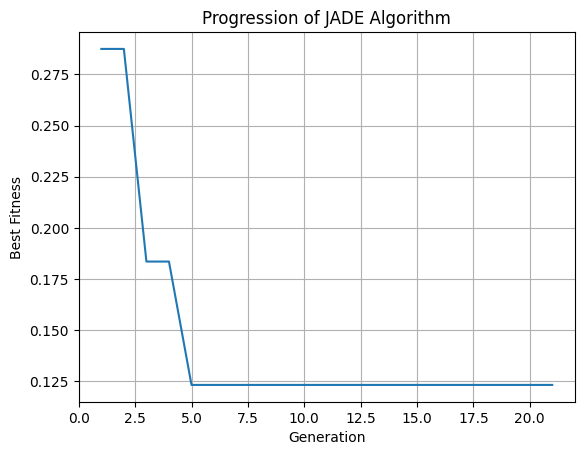

KeyboardInterrupt: 

In [45]:
# Run both algorithms multiple times
success_rates_made = run_algorithm_multiple_times(made, fitness_function, population, num_runs=5, dim=vector_length, NP=population_size, CR=0.9, F=0.8, max_gen=200)

In [49]:
population2 = make_population(4, population_size)


100%|██████████| 4720/4720 [00:52<00:00, 90.30it/s]

Population creation completed in 52.27 seconds


In [50]:
# Calculate fitness diversity
variance, stddev = calculate_fitness_diversity(population2)

print("Fitness Variance:", variance)
print("Fitness Standard Deviation:", stddev)

Fitness Variance: 76.119995
Fitness Standard Deviation: 8.724677


Run 1/5 - Random Seed: 886
Generation 1/200 - Best Fitness: 0.2284671515226364


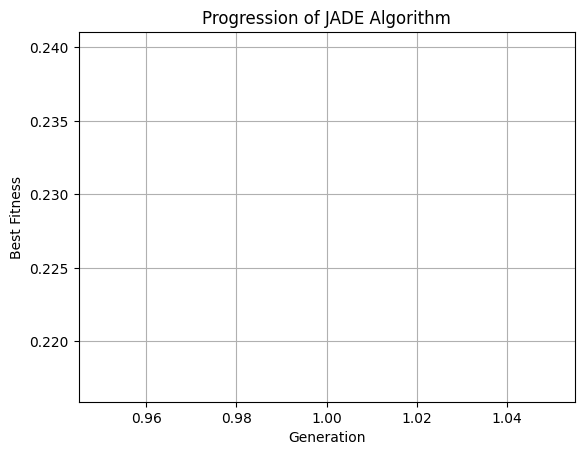

Generation 2/200 - Best Fitness: 0.2284671515226364
Generation 3/200 - Best Fitness: 0.2284671515226364
Generation 4/200 - Best Fitness: 0.2284671515226364
Generation 5/200 - Best Fitness: 0.2284671515226364
Generation 6/200 - Best Fitness: 0.2284671515226364
Generation 7/200 - Best Fitness: 0.2284671515226364
Generation 8/200 - Best Fitness: 0.2284671515226364
Generation 9/200 - Best Fitness: 0.2284671515226364
Generation 10/200 - Best Fitness: 0.13271090388298035
Generation 11/200 - Best Fitness: 0.13271090388298035


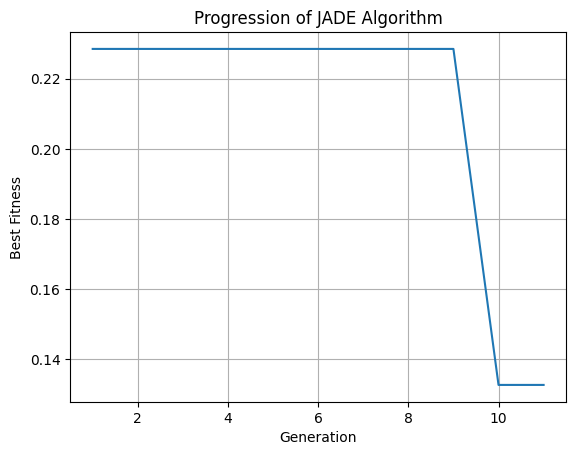

Generation 12/200 - Best Fitness: 0.13271090388298035
Generation 13/200 - Best Fitness: 0.13271090388298035
Generation 14/200 - Best Fitness: 0.13271090388298035
Generation 15/200 - Best Fitness: 0.13091731071472168
Generation 16/200 - Best Fitness: 0.13091731071472168
Generation 17/200 - Best Fitness: 0.13091731071472168
Generation 18/200 - Best Fitness: 0.13091731071472168
Generation 19/200 - Best Fitness: 0.13091731071472168
Generation 20/200 - Best Fitness: 0.13091731071472168
Generation 21/200 - Best Fitness: 0.13091731071472168


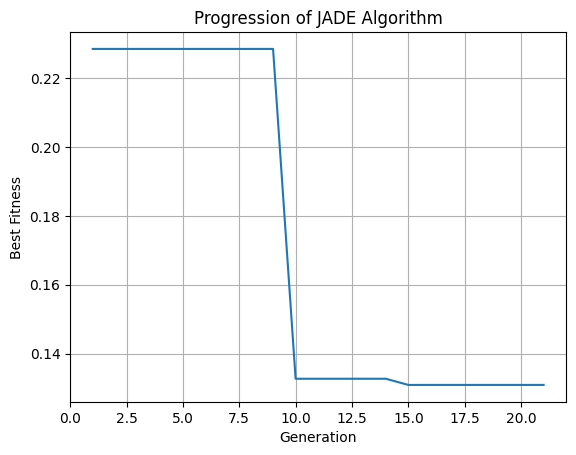

Generation 22/200 - Best Fitness: 0.13091731071472168
Generation 23/200 - Best Fitness: 0.13091731071472168
Generation 24/200 - Best Fitness: 0.13091731071472168
Generation 25/200 - Best Fitness: 0.13091731071472168
Generation 26/200 - Best Fitness: 0.13091731071472168
Generation 27/200 - Best Fitness: 0.13091731071472168
Generation 28/200 - Best Fitness: 0.11205171048641205
Generation 29/200 - Best Fitness: 0.11205171048641205
Generation 30/200 - Best Fitness: 0.11205171048641205
Generation 31/200 - Best Fitness: 0.11205171048641205


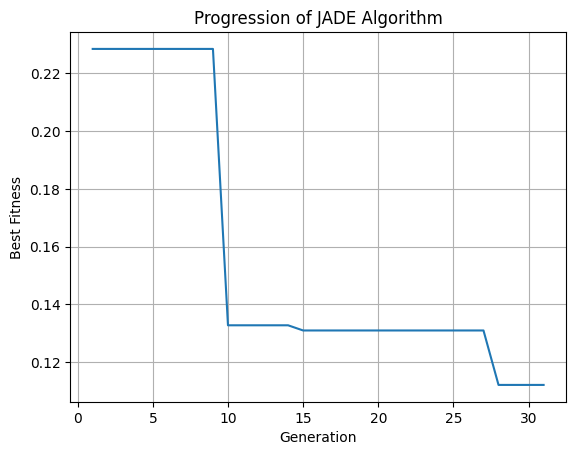

Generation 32/200 - Best Fitness: 0.11205171048641205
Generation 33/200 - Best Fitness: 0.11205171048641205
Generation 34/200 - Best Fitness: 0.11205171048641205
Generation 35/200 - Best Fitness: 0.11205171048641205
Generation 36/200 - Best Fitness: 0.11205171048641205
Generation 37/200 - Best Fitness: 0.11205171048641205
Generation 38/200 - Best Fitness: 0.11205171048641205
Generation 39/200 - Best Fitness: 0.11205171048641205
Generation 40/200 - Best Fitness: 0.11205171048641205
Generation 41/200 - Best Fitness: 0.11205171048641205


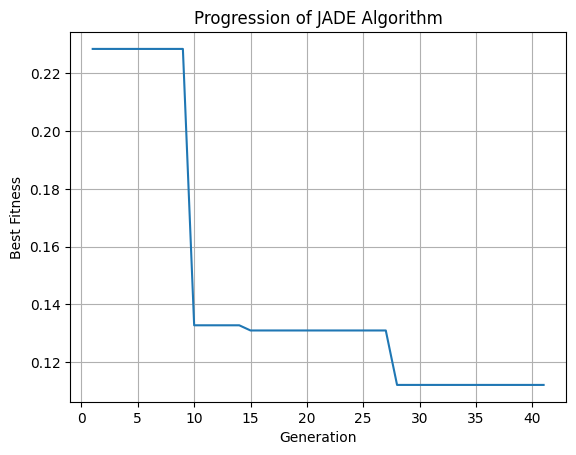

Generation 42/200 - Best Fitness: 0.11205171048641205
Generation 43/200 - Best Fitness: 0.11205171048641205
Generation 44/200 - Best Fitness: 0.11205171048641205
Generation 45/200 - Best Fitness: 0.11205171048641205
Generation 46/200 - Best Fitness: 0.11205171048641205
Generation 47/200 - Best Fitness: 0.11205171048641205
Generation 48/200 - Best Fitness: 0.11205171048641205
Generation 49/200 - Best Fitness: 0.11205171048641205
Generation 50/200 - Best Fitness: 0.11205171048641205
Generation 51/200 - Best Fitness: 0.11205171048641205


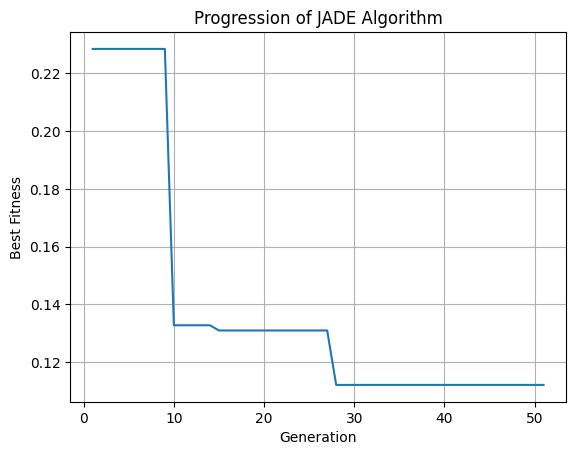

Generation 52/200 - Best Fitness: 0.11205171048641205
Generation 53/200 - Best Fitness: 0.11205171048641205
Generation 54/200 - Best Fitness: 0.11205171048641205
Generation 55/200 - Best Fitness: 0.11205171048641205
Generation 56/200 - Best Fitness: 0.11205171048641205
Generation 57/200 - Best Fitness: 0.11205171048641205
Generation 58/200 - Best Fitness: 0.11205171048641205
Generation 59/200 - Best Fitness: 0.11205171048641205
Generation 60/200 - Best Fitness: 0.11205171048641205
Generation 61/200 - Best Fitness: 0.11205171048641205


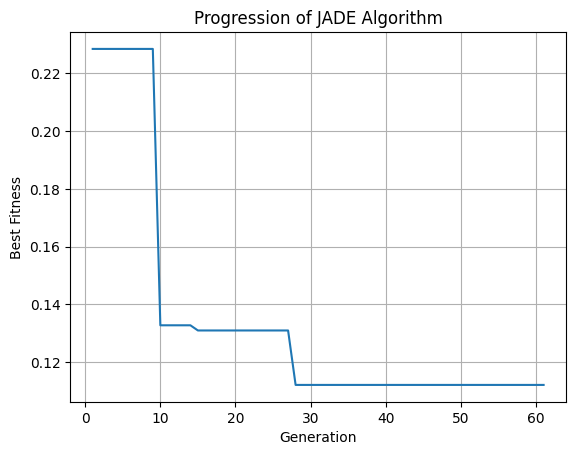

Generation 62/200 - Best Fitness: 0.11205171048641205
Generation 63/200 - Best Fitness: 0.11205171048641205
Generation 64/200 - Best Fitness: 0.11205171048641205
Generation 65/200 - Best Fitness: 0.11205171048641205
Generation 66/200 - Best Fitness: 0.11205171048641205
Generation 67/200 - Best Fitness: 0.11205171048641205
Generation 68/200 - Best Fitness: 0.11205171048641205
Generation 69/200 - Best Fitness: 0.11205171048641205
Generation 70/200 - Best Fitness: 0.11205171048641205
Generation 71/200 - Best Fitness: 0.11205171048641205


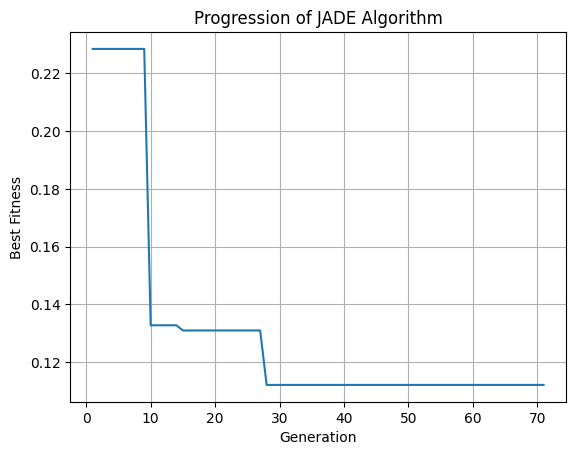

Generation 72/200 - Best Fitness: 0.11205171048641205
Generation 73/200 - Best Fitness: 0.11205171048641205
Generation 74/200 - Best Fitness: 0.11205171048641205
Generation 75/200 - Best Fitness: 0.11205171048641205
Generation 76/200 - Best Fitness: 0.11205171048641205
Generation 77/200 - Best Fitness: 0.11205171048641205
Generation 78/200 - Best Fitness: 0.11205171048641205
Generation 79/200 - Best Fitness: 0.11205171048641205
Generation 80/200 - Best Fitness: 0.11205171048641205
Generation 81/200 - Best Fitness: 0.11205171048641205


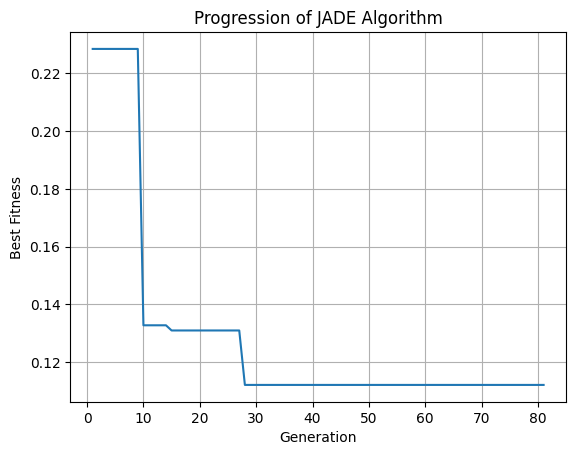

Generation 82/200 - Best Fitness: 0.11205171048641205
Generation 83/200 - Best Fitness: 0.11205171048641205
Generation 84/200 - Best Fitness: 0.11205171048641205
Generation 85/200 - Best Fitness: 0.11205171048641205
Generation 86/200 - Best Fitness: 0.11205171048641205
Generation 87/200 - Best Fitness: 0.11205171048641205
Generation 88/200 - Best Fitness: 0.11205171048641205
Generation 89/200 - Best Fitness: 0.11205171048641205
Generation 90/200 - Best Fitness: 0.11205171048641205
Generation 91/200 - Best Fitness: 0.11205171048641205


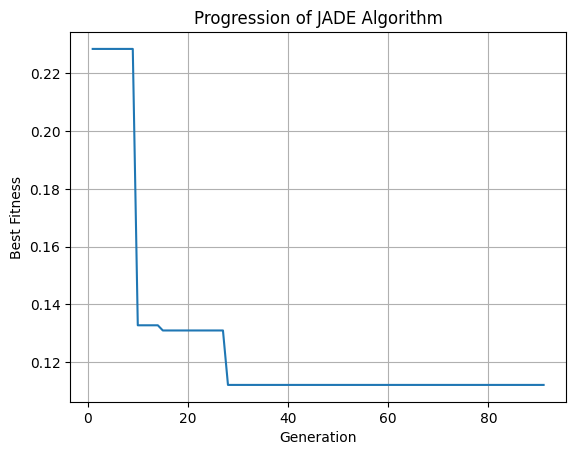

Generation 92/200 - Best Fitness: 0.11205171048641205
Generation 93/200 - Best Fitness: 0.11205171048641205
Generation 94/200 - Best Fitness: 0.11205171048641205
Generation 95/200 - Best Fitness: 0.11205171048641205
Generation 96/200 - Best Fitness: 0.11205171048641205
Generation 97/200 - Best Fitness: 0.11205171048641205
Generation 98/200 - Best Fitness: 0.11205171048641205
Generation 99/200 - Best Fitness: 0.11205171048641205
Generation 100/200 - Best Fitness: 0.11205171048641205
Generation 101/200 - Best Fitness: 0.11205171048641205


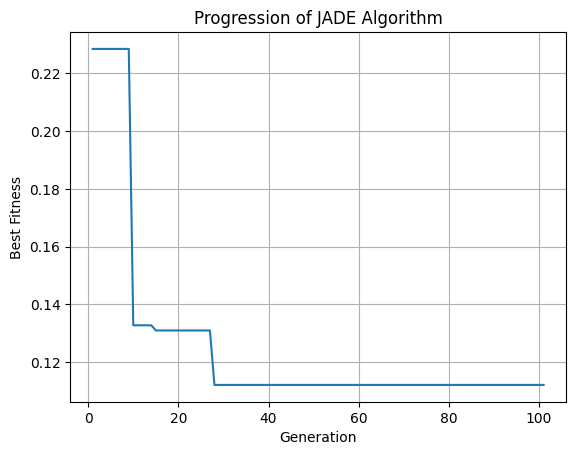

Generation 102/200 - Best Fitness: 0.11205171048641205
Generation 103/200 - Best Fitness: 0.11205171048641205
Generation 104/200 - Best Fitness: 0.11205171048641205
Generation 105/200 - Best Fitness: 0.11205171048641205
Generation 106/200 - Best Fitness: 0.11205171048641205
Generation 107/200 - Best Fitness: 0.11205171048641205
Generation 108/200 - Best Fitness: 0.11205171048641205
Generation 109/200 - Best Fitness: 0.11205171048641205
Generation 110/200 - Best Fitness: 0.11205171048641205
Generation 111/200 - Best Fitness: 0.11205171048641205


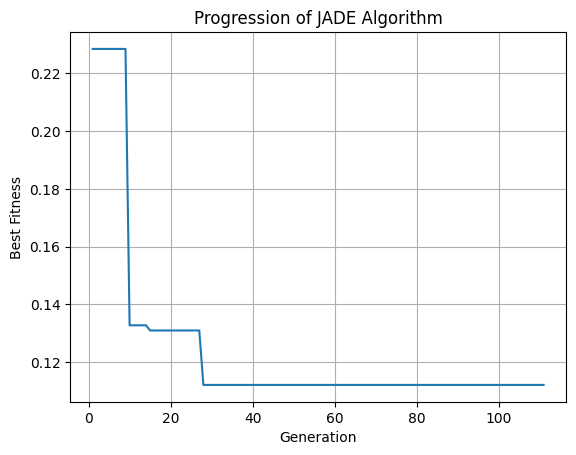

Generation 112/200 - Best Fitness: 0.11205171048641205
Generation 113/200 - Best Fitness: 0.11205171048641205
Generation 114/200 - Best Fitness: 0.11205171048641205
Generation 115/200 - Best Fitness: 0.11205171048641205
Generation 116/200 - Best Fitness: 0.11205171048641205
Generation 117/200 - Best Fitness: 0.11205171048641205
Generation 118/200 - Best Fitness: 0.11205171048641205
Generation 119/200 - Best Fitness: 0.11205171048641205
Generation 120/200 - Best Fitness: 0.11205171048641205
Generation 121/200 - Best Fitness: 0.11205171048641205


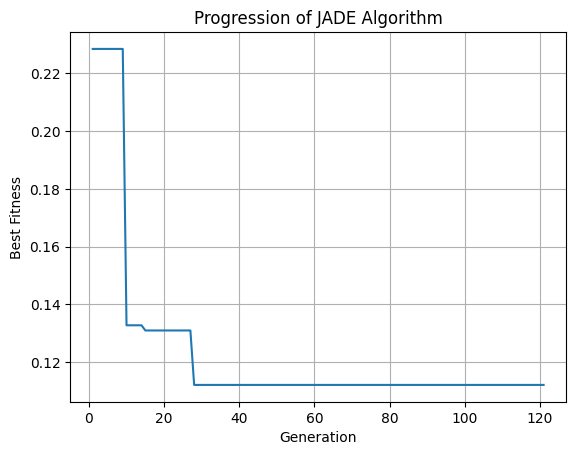

Generation 122/200 - Best Fitness: 0.11205171048641205
Generation 123/200 - Best Fitness: 0.11205171048641205
Generation 124/200 - Best Fitness: 0.11205171048641205
Generation 125/200 - Best Fitness: 0.11205171048641205
Generation 126/200 - Best Fitness: 0.11205171048641205
Generation 127/200 - Best Fitness: 0.11205171048641205
Generation 128/200 - Best Fitness: 0.11205171048641205
Terminating due to 100 stagnant generations.
Run 2/5 - Random Seed: 352
Generation 1/200 - Best Fitness: 0.31355658173561096


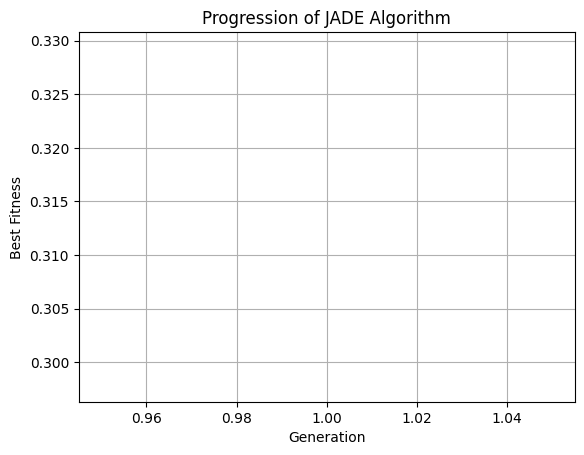

Generation 2/200 - Best Fitness: 0.31355658173561096
Generation 3/200 - Best Fitness: 0.14834648370742798
Generation 4/200 - Best Fitness: 0.14834648370742798
Generation 5/200 - Best Fitness: 0.14834648370742798
Generation 6/200 - Best Fitness: 0.14834648370742798
Generation 7/200 - Best Fitness: 0.14834648370742798
Generation 8/200 - Best Fitness: 0.14834648370742798
Generation 9/200 - Best Fitness: 0.14834648370742798
Generation 10/200 - Best Fitness: 0.14834648370742798
Generation 11/200 - Best Fitness: 0.14834648370742798


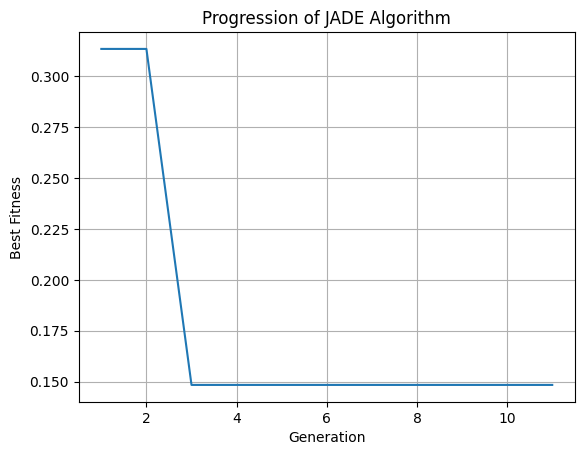

Generation 12/200 - Best Fitness: 0.14834648370742798
Generation 13/200 - Best Fitness: 0.14834648370742798
Generation 14/200 - Best Fitness: 0.12728330492973328
Generation 15/200 - Best Fitness: 0.12728330492973328
Generation 16/200 - Best Fitness: 0.12728330492973328
Generation 17/200 - Best Fitness: 0.12728330492973328
Generation 18/200 - Best Fitness: 0.12728330492973328
Generation 19/200 - Best Fitness: 0.12728330492973328
Generation 20/200 - Best Fitness: 0.12728330492973328
Generation 21/200 - Best Fitness: 0.12728330492973328


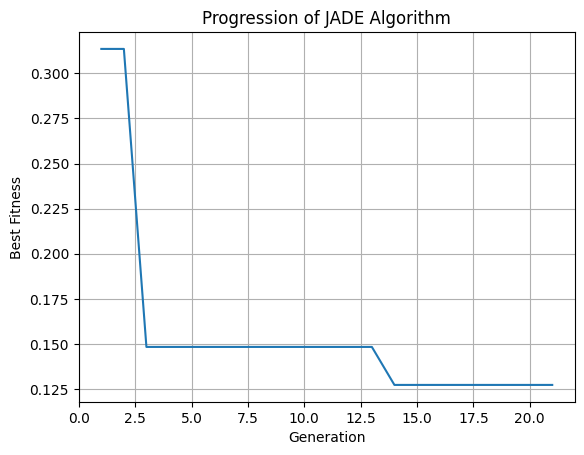

Generation 22/200 - Best Fitness: 0.12728330492973328
Generation 23/200 - Best Fitness: 0.12728330492973328
Generation 24/200 - Best Fitness: 0.12728330492973328
Generation 25/200 - Best Fitness: 0.12728330492973328
Generation 26/200 - Best Fitness: 0.12728330492973328
Generation 27/200 - Best Fitness: 0.11905333399772644
Generation 28/200 - Best Fitness: 0.11905333399772644
Generation 29/200 - Best Fitness: 0.11905333399772644
Generation 30/200 - Best Fitness: 0.11905333399772644
Generation 31/200 - Best Fitness: 0.11905333399772644


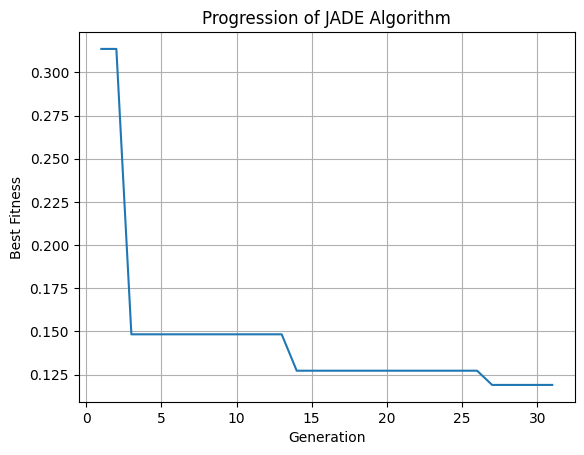

Generation 32/200 - Best Fitness: 0.11905333399772644
Generation 33/200 - Best Fitness: 0.11905333399772644
Generation 34/200 - Best Fitness: 0.11905333399772644
Generation 35/200 - Best Fitness: 0.11905333399772644
Generation 36/200 - Best Fitness: 0.11905333399772644
Generation 37/200 - Best Fitness: 0.11905333399772644
Generation 38/200 - Best Fitness: 0.11905333399772644
Generation 39/200 - Best Fitness: 0.11905333399772644
Generation 40/200 - Best Fitness: 0.11905333399772644
Generation 41/200 - Best Fitness: 0.11905333399772644


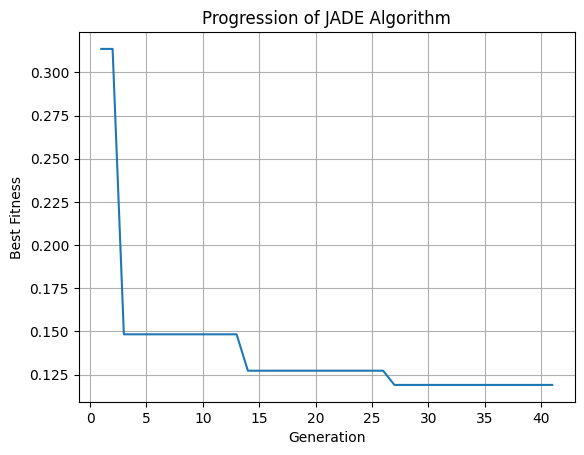

Generation 42/200 - Best Fitness: 0.11905333399772644
Generation 43/200 - Best Fitness: 0.11905333399772644
Generation 44/200 - Best Fitness: 0.11905333399772644
Generation 45/200 - Best Fitness: 0.11905333399772644
Generation 46/200 - Best Fitness: 0.11905333399772644
Generation 47/200 - Best Fitness: 0.11905333399772644
Generation 48/200 - Best Fitness: 0.11905333399772644
Generation 49/200 - Best Fitness: 0.11905333399772644
Generation 50/200 - Best Fitness: 0.11905333399772644
Generation 51/200 - Best Fitness: 0.11905333399772644


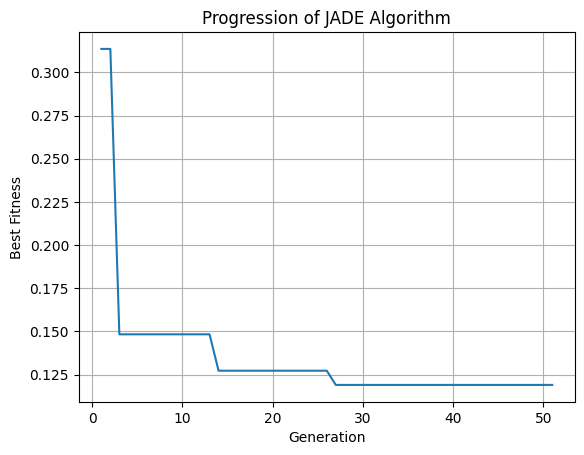

Generation 52/200 - Best Fitness: 0.11905333399772644
Generation 53/200 - Best Fitness: 0.11905333399772644
Generation 54/200 - Best Fitness: 0.11905333399772644
Generation 55/200 - Best Fitness: 0.11905333399772644
Generation 56/200 - Best Fitness: 0.11905333399772644
Generation 57/200 - Best Fitness: 0.11905333399772644
Generation 58/200 - Best Fitness: 0.11905333399772644
Generation 59/200 - Best Fitness: 0.11905333399772644
Generation 60/200 - Best Fitness: 0.11905333399772644
Generation 61/200 - Best Fitness: 0.11905333399772644


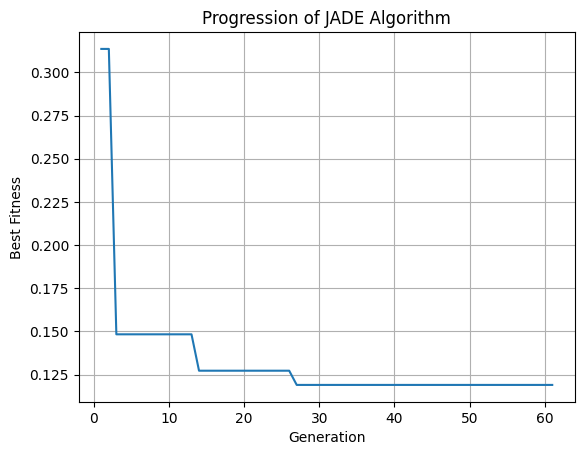

Generation 62/200 - Best Fitness: 0.11905333399772644
Generation 63/200 - Best Fitness: 0.11905333399772644
Generation 64/200 - Best Fitness: 0.11905333399772644
Generation 65/200 - Best Fitness: 0.11905333399772644
Generation 66/200 - Best Fitness: 0.11905333399772644
Generation 67/200 - Best Fitness: 0.11905333399772644
Generation 68/200 - Best Fitness: 0.11905333399772644
Generation 69/200 - Best Fitness: 0.11905333399772644
Generation 70/200 - Best Fitness: 0.11905333399772644
Generation 71/200 - Best Fitness: 0.11905333399772644


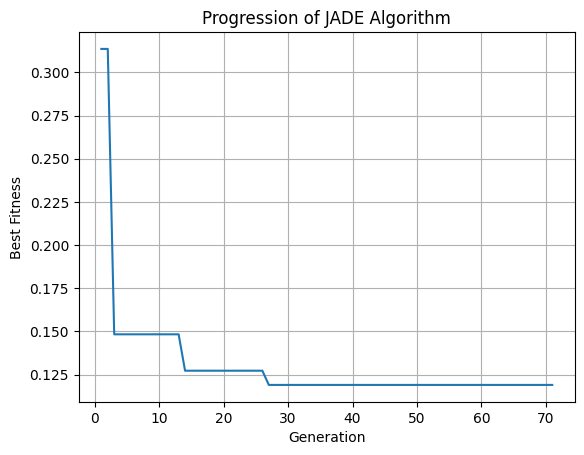

Generation 72/200 - Best Fitness: 0.11905333399772644
Generation 73/200 - Best Fitness: 0.11905333399772644
Generation 74/200 - Best Fitness: 0.11905333399772644
Generation 75/200 - Best Fitness: 0.11905333399772644
Generation 76/200 - Best Fitness: 0.11905333399772644
Generation 77/200 - Best Fitness: 0.11905333399772644
Generation 78/200 - Best Fitness: 0.11905333399772644
Generation 79/200 - Best Fitness: 0.11905333399772644
Generation 80/200 - Best Fitness: 0.11905333399772644
Generation 81/200 - Best Fitness: 0.11905333399772644


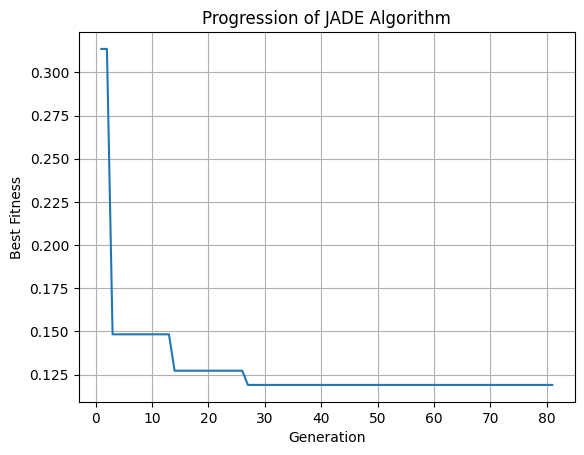

Generation 82/200 - Best Fitness: 0.11905333399772644
Generation 83/200 - Best Fitness: 0.11905333399772644
Generation 84/200 - Best Fitness: 0.11905333399772644
Generation 85/200 - Best Fitness: 0.11905333399772644
Generation 86/200 - Best Fitness: 0.11905333399772644
Generation 87/200 - Best Fitness: 0.11905333399772644
Generation 88/200 - Best Fitness: 0.11905333399772644
Generation 89/200 - Best Fitness: 0.11905333399772644
Generation 90/200 - Best Fitness: 0.11905333399772644
Generation 91/200 - Best Fitness: 0.11905333399772644


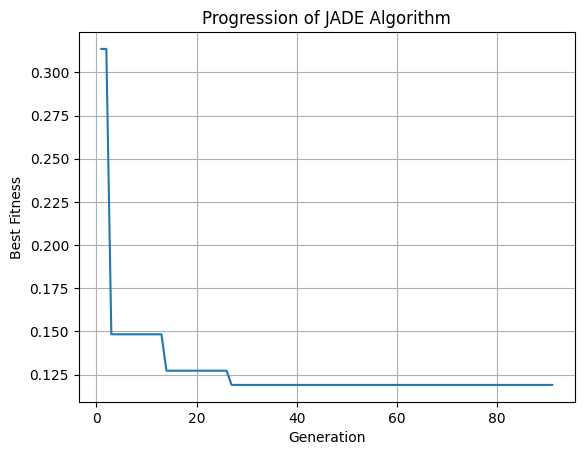

Generation 92/200 - Best Fitness: 0.11905333399772644
Generation 93/200 - Best Fitness: 0.11905333399772644
Generation 94/200 - Best Fitness: 0.11905333399772644
Generation 95/200 - Best Fitness: 0.11905333399772644
Generation 96/200 - Best Fitness: 0.11905333399772644
Generation 97/200 - Best Fitness: 0.11905333399772644
Generation 98/200 - Best Fitness: 0.11905333399772644
Generation 99/200 - Best Fitness: 0.11905333399772644
Generation 100/200 - Best Fitness: 0.11905333399772644
Generation 101/200 - Best Fitness: 0.11905333399772644


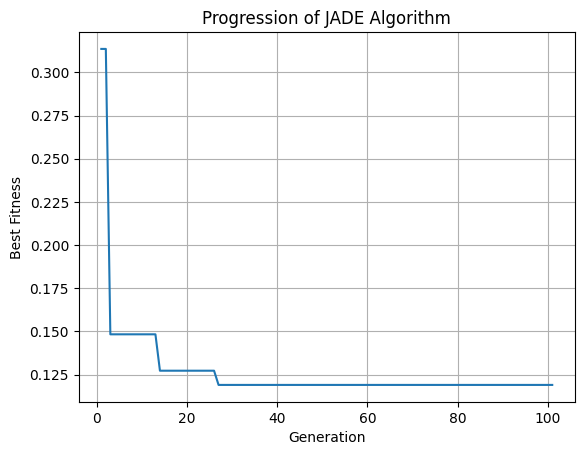

Generation 102/200 - Best Fitness: 0.11905333399772644
Generation 103/200 - Best Fitness: 0.11905333399772644
Generation 104/200 - Best Fitness: 0.11905333399772644
Generation 105/200 - Best Fitness: 0.11905333399772644
Generation 106/200 - Best Fitness: 0.11905333399772644
Generation 107/200 - Best Fitness: 0.11905333399772644
Generation 108/200 - Best Fitness: 0.11905333399772644
Generation 109/200 - Best Fitness: 0.11905333399772644
Generation 110/200 - Best Fitness: 0.11905333399772644
Generation 111/200 - Best Fitness: 0.11905333399772644


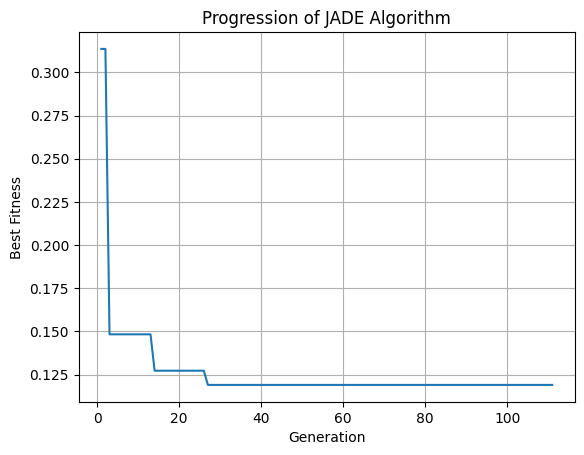

Generation 112/200 - Best Fitness: 0.11905333399772644
Generation 113/200 - Best Fitness: 0.11905333399772644
Generation 114/200 - Best Fitness: 0.11905333399772644
Generation 115/200 - Best Fitness: 0.11905333399772644
Generation 116/200 - Best Fitness: 0.11905333399772644
Generation 117/200 - Best Fitness: 0.11905333399772644
Generation 118/200 - Best Fitness: 0.11905333399772644
Generation 119/200 - Best Fitness: 0.11905333399772644
Generation 120/200 - Best Fitness: 0.11905333399772644
Generation 121/200 - Best Fitness: 0.11905333399772644


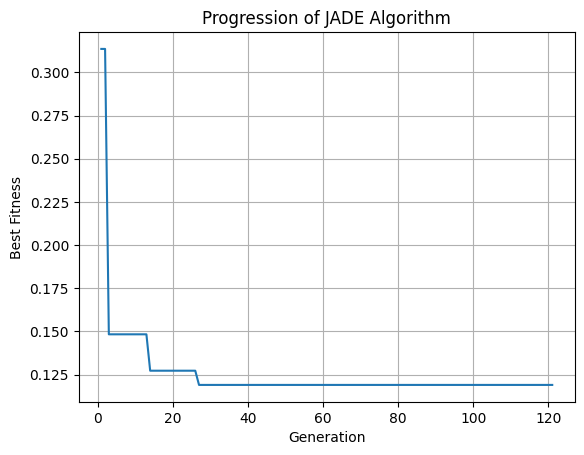

Generation 122/200 - Best Fitness: 0.11905333399772644
Generation 123/200 - Best Fitness: 0.11905333399772644
Generation 124/200 - Best Fitness: 0.11905333399772644
Generation 125/200 - Best Fitness: 0.11905333399772644
Generation 126/200 - Best Fitness: 0.11905333399772644
Generation 127/200 - Best Fitness: 0.11905333399772644
Terminating due to 100 stagnant generations.
Run 3/5 - Random Seed: 619
Generation 1/200 - Best Fitness: 0.4397875964641571


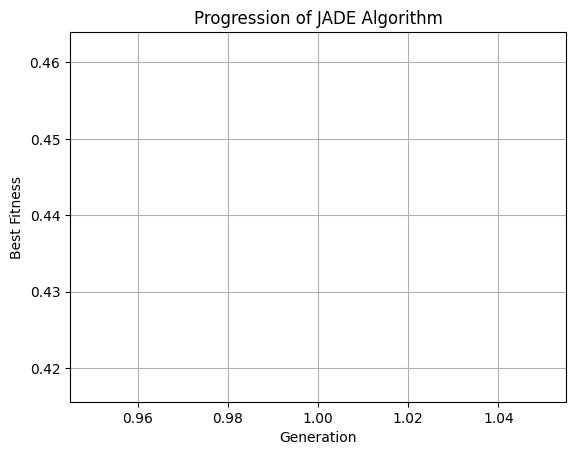

Generation 2/200 - Best Fitness: 0.3210276961326599
Generation 3/200 - Best Fitness: 0.20257116854190826
Generation 4/200 - Best Fitness: 0.20257116854190826
Generation 5/200 - Best Fitness: 0.20257116854190826
Generation 6/200 - Best Fitness: 0.20257116854190826
Generation 7/200 - Best Fitness: 0.20257116854190826
Generation 8/200 - Best Fitness: 0.20257116854190826
Generation 9/200 - Best Fitness: 0.20257116854190826
Generation 10/200 - Best Fitness: 0.20257116854190826
Generation 11/200 - Best Fitness: 0.20257116854190826


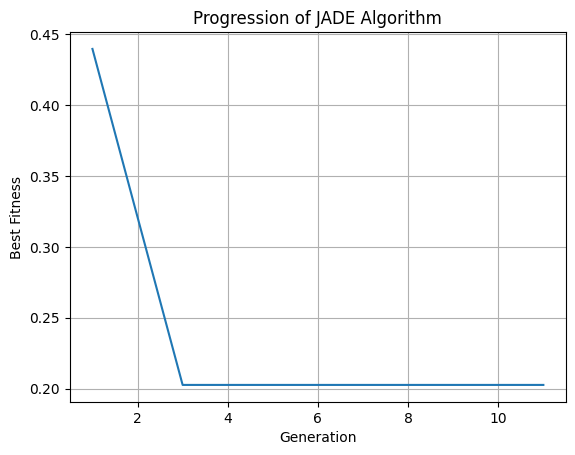

Generation 12/200 - Best Fitness: 0.20257116854190826
Generation 13/200 - Best Fitness: 0.20257116854190826
Generation 14/200 - Best Fitness: 0.20257116854190826
Generation 15/200 - Best Fitness: 0.20257116854190826
Generation 16/200 - Best Fitness: 0.20257116854190826
Generation 17/200 - Best Fitness: 0.20257116854190826
Generation 18/200 - Best Fitness: 0.13940776884555817
Generation 19/200 - Best Fitness: 0.13940776884555817
Generation 20/200 - Best Fitness: 0.13940776884555817
Generation 21/200 - Best Fitness: 0.13940776884555817


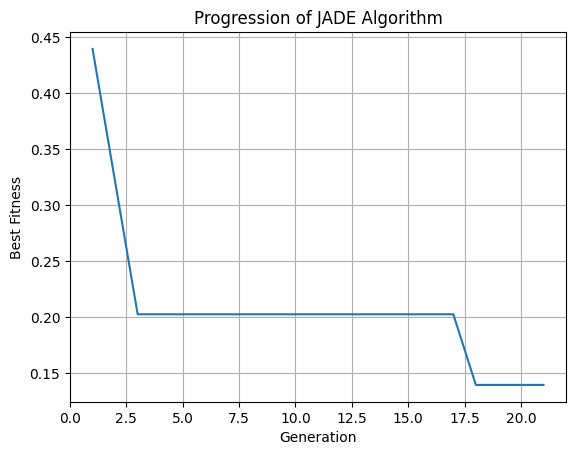

Generation 22/200 - Best Fitness: 0.13940776884555817
Generation 23/200 - Best Fitness: 0.13940776884555817
Generation 24/200 - Best Fitness: 0.13940776884555817
Generation 25/200 - Best Fitness: 0.13940776884555817
Generation 26/200 - Best Fitness: 0.13940776884555817
Generation 27/200 - Best Fitness: 0.13940776884555817
Generation 28/200 - Best Fitness: 0.13940776884555817
Generation 29/200 - Best Fitness: 0.13940776884555817
Generation 30/200 - Best Fitness: 0.13940776884555817
Generation 31/200 - Best Fitness: 0.13940776884555817


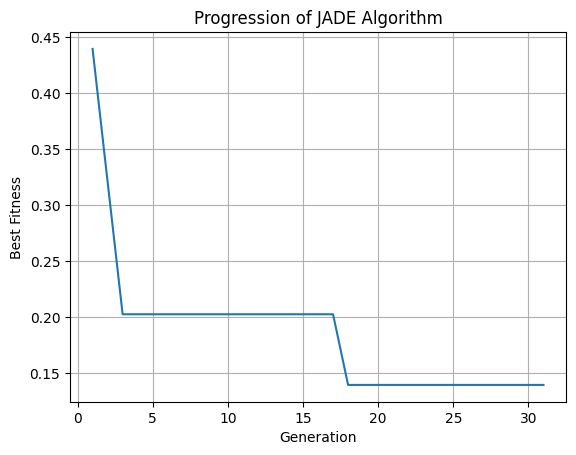

Generation 32/200 - Best Fitness: 0.13940776884555817
Generation 33/200 - Best Fitness: 0.13940776884555817
Generation 34/200 - Best Fitness: 0.13940776884555817
Generation 35/200 - Best Fitness: 0.13940776884555817
Generation 36/200 - Best Fitness: 0.13940776884555817
Generation 37/200 - Best Fitness: 0.13940776884555817
Generation 38/200 - Best Fitness: 0.13940776884555817
Generation 39/200 - Best Fitness: 0.13940776884555817
Generation 40/200 - Best Fitness: 0.13940776884555817
Generation 41/200 - Best Fitness: 0.13940776884555817


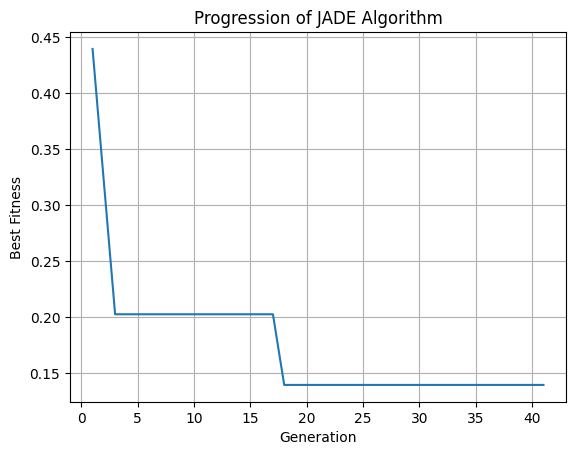

Generation 42/200 - Best Fitness: 0.13940776884555817
Generation 43/200 - Best Fitness: 0.13940776884555817
Generation 44/200 - Best Fitness: 0.13940776884555817
Generation 45/200 - Best Fitness: 0.13940776884555817
Generation 46/200 - Best Fitness: 0.13940776884555817
Generation 47/200 - Best Fitness: 0.13940776884555817
Generation 48/200 - Best Fitness: 0.13940776884555817
Generation 49/200 - Best Fitness: 0.13940776884555817
Generation 50/200 - Best Fitness: 0.13940776884555817
Generation 51/200 - Best Fitness: 0.13940776884555817


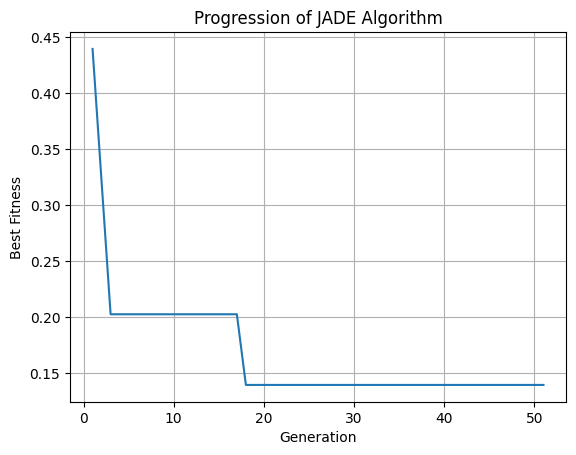

Generation 52/200 - Best Fitness: 0.13940776884555817
Generation 53/200 - Best Fitness: 0.13940776884555817
Generation 54/200 - Best Fitness: 0.13940776884555817
Generation 55/200 - Best Fitness: 0.13940776884555817
Generation 56/200 - Best Fitness: 0.13940776884555817
Generation 57/200 - Best Fitness: 0.13940776884555817
Generation 58/200 - Best Fitness: 0.13940776884555817
Generation 59/200 - Best Fitness: 0.13940776884555817
Generation 60/200 - Best Fitness: 0.13940776884555817
Generation 61/200 - Best Fitness: 0.13940776884555817


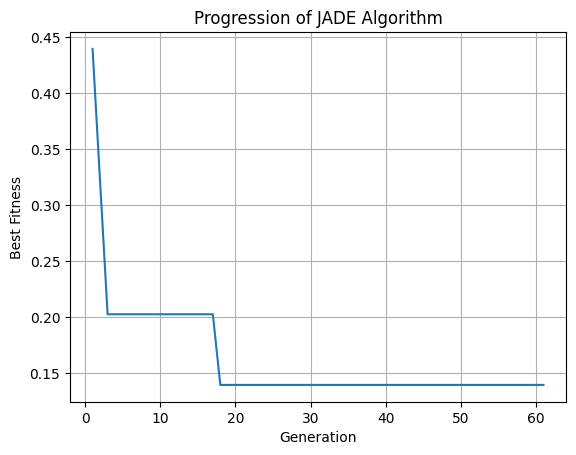

Generation 62/200 - Best Fitness: 0.13940776884555817
Generation 63/200 - Best Fitness: 0.13940776884555817
Generation 64/200 - Best Fitness: 0.13940776884555817
Generation 65/200 - Best Fitness: 0.13940776884555817
Generation 66/200 - Best Fitness: 0.13940776884555817
Generation 67/200 - Best Fitness: 0.13940776884555817
Generation 68/200 - Best Fitness: 0.13940776884555817
Generation 69/200 - Best Fitness: 0.13940776884555817
Generation 70/200 - Best Fitness: 0.13940776884555817
Generation 71/200 - Best Fitness: 0.13940776884555817


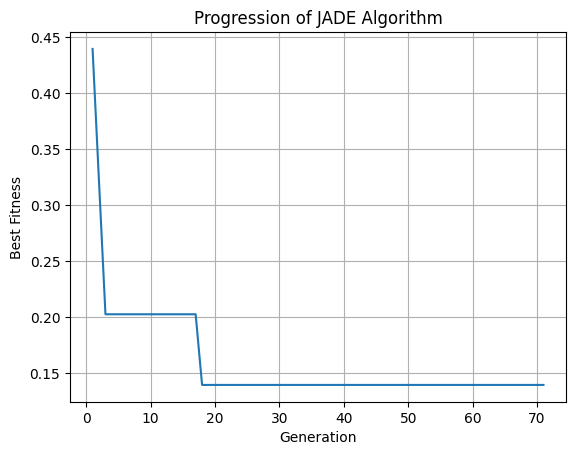

Generation 72/200 - Best Fitness: 0.13940776884555817
Generation 73/200 - Best Fitness: 0.13940776884555817
Generation 74/200 - Best Fitness: 0.13940776884555817
Generation 75/200 - Best Fitness: 0.13940776884555817
Generation 76/200 - Best Fitness: 0.13940776884555817
Generation 77/200 - Best Fitness: 0.13940776884555817
Generation 78/200 - Best Fitness: 0.13940776884555817
Generation 79/200 - Best Fitness: 0.13940776884555817
Generation 80/200 - Best Fitness: 0.13940776884555817
Generation 81/200 - Best Fitness: 0.13940776884555817


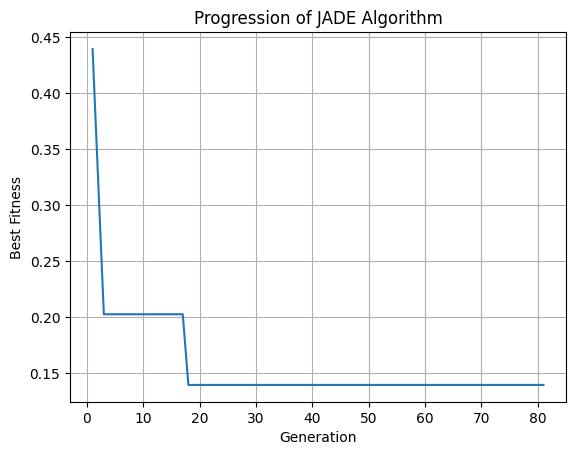

Generation 82/200 - Best Fitness: 0.13940776884555817
Generation 83/200 - Best Fitness: 0.13940776884555817
Generation 84/200 - Best Fitness: 0.13940776884555817
Generation 85/200 - Best Fitness: 0.13940776884555817
Generation 86/200 - Best Fitness: 0.13940776884555817
Generation 87/200 - Best Fitness: 0.13940776884555817
Generation 88/200 - Best Fitness: 0.13940776884555817
Generation 89/200 - Best Fitness: 0.13940776884555817
Generation 90/200 - Best Fitness: 0.13940776884555817
Generation 91/200 - Best Fitness: 0.13940776884555817


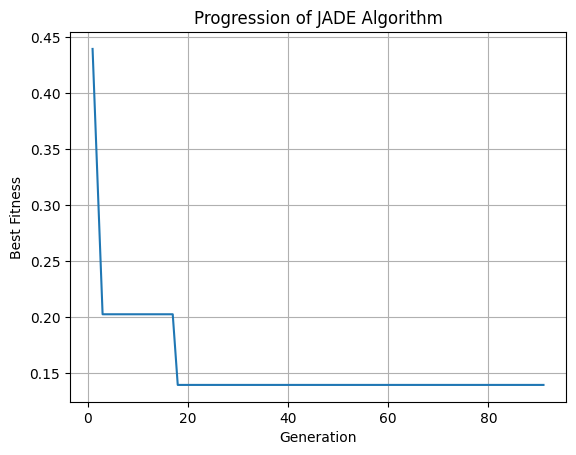

Generation 92/200 - Best Fitness: 0.13940776884555817
Generation 93/200 - Best Fitness: 0.13940776884555817
Generation 94/200 - Best Fitness: 0.13940776884555817
Generation 95/200 - Best Fitness: 0.13940776884555817


In [ ]:
success_rates_made = run_algorithm_multiple_times(jade, fitness_function, population2, num_runs=5, dim=vector_length, NP=population_size, CR=0.9, F=0.8, max_gen=200)

In [ ]:
len(population2)